In [ ]:
!pip install newspaper3k

^C


In [2]:
!pip install lxml_html_clean

In [3]:
!pip install selenium

In [4]:
pip install stable-baselines3 gym yfinance transformers textblob


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/b2/38/7533745b517c34b7b749a7a21f631711354a3d4d39a840d75d20c94d71a0/yfinance-0.2.51-py2.py3-none-any.whl.metadata
  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     - ------------------------------------- 30.7/948.2 kB 1.3 MB/s eta 0:00:01
 

In [5]:
!pip install newsapi-python

In [1]:
import os
import pandas as pd
import zipfile
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import DecisionTransformerModel, DecisionTransformerConfig
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
from newspaper import Article
from selenium import webdriver
from selenium.webdriver.common.by import By
from stable_baselines3 import PPO, DQN
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_checker import check_env
from gym import Env
from gym.spaces import Discrete, Box
from newsapi import NewsApiClient  # NewsAPI package
import torch.nn as nn
import torch.optim as optim
#from google.colab import files
import time
from datetime import datetime
import yfinance as yf
from textblob import TextBlob

In [2]:
# Path to the ZIP file
zip_file_path = 'D:\\Downloads\\archive_3.zip'

# Check if the file exists
if not os.path.exists(zip_file_path):
    print(f"File not found: {zip_file_path}")
else:
    try:
        # Open the ZIP file
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # List all files in the ZIP
            zip_contents = zip_ref.namelist()
            print("Contents of the ZIP file:", zip_contents)

            # Extract all the files to a directory
            extract_path = 'extracted_data'
            zip_ref.extractall(extract_path)
            print(f"Files successfully extracted to: {extract_path}")
    except zipfile.BadZipFile:
        print("The file is not a valid ZIP file or it is corrupted.")
    except Exception as e:
        print(f"An error occurred: {e}")

Contents of the ZIP file: ['sp500_companies.csv', 'sp500_index.csv', 'sp500_stocks.csv']
Files successfully extracted to: extracted_data


In [ ]:
stock_data_path = os.path.join(extract_path, 'sp500_stocks.csv')
companies_data_path = os.path.join(extract_path, 'sp500_companies.csv')
index_data_path = os.path.join(extract_path, 'sp500_index.csv')

# Use these paths to load the CSV files
stock_data = pd.read_csv(stock_data_path)
companies_data = pd.read_csv(companies_data_path)
index_data = pd.read_csv(index_data_path)
# Preview the data
print(stock_data.head())
print(companies_data.head())
print(index_data.head())

         Date Symbol  Adj Close      Close       High        Low       Open  \
0  2010-01-04    MMM  44.016720  69.414719  69.774246  69.122070  69.473244   
1  2010-01-05    MMM  43.741032  68.979935  69.590302  68.311035  69.230766   
2  2010-01-06    MMM  44.361347  69.958191  70.735786  69.824417  70.133781   
3  2010-01-07    MMM  44.393150  70.008362  70.033447  68.662209  69.665550   
4  2010-01-08    MMM  44.705982  70.501671  70.501671  69.648827  69.974915   

      Volume  
0  3640265.0  
1  3405012.0  
2  6301126.0  
3  5346240.0  
4  4073337.0  
  Exchange Symbol              Shortname               Longname  \
0      NMS   AAPL             Apple Inc.             Apple Inc.   
1      NMS   MSFT  Microsoft Corporation  Microsoft Corporation   
2      NMS   NVDA     NVIDIA Corporation     NVIDIA Corporation   
3      NMS   AMZN       Amazon.com, Inc.       Amazon.com, Inc.   
4      NMS  GOOGL          Alphabet Inc.          Alphabet Inc.   

                   Sector       

In [10]:
!pip install praw

In [13]:
pip install asyncpraw

  Obtaining dependency information for asyncpraw from https://files.pythonhosted.org/packages/8d/45/65671411cfaf816e4ca60b3417e79b03c98edebbe6b157dc79063f8a469b/asyncpraw-7.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for aiosqlite<=0.17.0 from https://files.pythonhosted.org/packages/a0/48/77c0092f716c4bf9460dca44f5120f70b8f71f14a12f40d22551a7152719/aiosqlite-0.17.0-py3-none-any.whl.metadata
  Obtaining dependency information for asyncprawcore<3,>=2.4 from https://files.pythonhosted.org/packages/1d/a0/a1f216c7ad7fd94482242eb92d6903c0ed5f3340436b952db2a42d2eddeb/asyncprawcore-2.4.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/196.4 kB ? eta -:--:--
   ------ --------------------------------- 30.7/196.4 kB 1.3 MB/s eta 0:00:01
   -------------- ------------------------ 71.7/196.4 kB 975.2 kB/s eta 0:00:01
   ----------------------------- ---------- 143.4/196.4 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------  194.6/196.4 

In [14]:
import praw
from textblob import TextBlob
import pandas as pd
from datetime import datetime
import time

# Reddit API credentials (Replace with your credentials)
client_id = "BWFDbinpKaa5LuqD5ujSEQ"
client_secret = "XUlI5wkSYOE-6jDoEdKdhj_Jdqh99w"
user_agent = "SentimentFetch:v1.0 (by /u/Stunning-Hornet6159)"

# Authenticate with Reddit API
reddit = praw.Reddit(client_id=client_id, client_secret=client_secret, user_agent=user_agent)

def generate_queries(base_terms, modifiers):
    """
    Generate detailed search queries by combining base terms with modifiers.
    """
    return [f"{base} {mod}" for base in base_terms for mod in modifiers]

def fetch_post_and_comments(submission):
    """
    Fetch the post details and its comments, returning them as separate rows.
    """
    sentiment_data = []
    # Fetch post sentiment
    sentiment_title = TextBlob(submission.title).sentiment.polarity
    sentiment_body = TextBlob(submission.selftext).sentiment.polarity if submission.selftext else 0

    # Add post data as a row
    sentiment_data.append({
        "post_id": submission.id,
        "type": "post",
        "subreddit": submission.subreddit.display_name,
        "content": submission.title,
        "sentiment": sentiment_title,
        "created_at": datetime.utcfromtimestamp(submission.created_utc),
        "upvotes": submission.score,
        "num_comments": submission.num_comments,
        "url": submission.url
    })

    # Fetch comments
    submission.comments.replace_more(limit=0)  # Fetch all comments (skip "more" placeholders)
    for comment in submission.comments.list():
        comment_sentiment = TextBlob(comment.body).sentiment.polarity
        sentiment_data.append({
            "post_id": submission.id,
            "type": "comment",
            "subreddit": submission.subreddit.display_name,
            "content": comment.body,
            "sentiment": comment_sentiment,
            "created_at": datetime.utcfromtimestamp(comment.created_utc),
            "upvotes": comment.score,
            "num_comments": 0,
            "url": submission.url
        })
        time.sleep(0.5)  # Add delay to avoid rate limiting

    return sentiment_data

def fetch_reddit_posts_and_comments(subreddit, query, start_date, end_date, max_posts_per_query=100):
    """
    Fetch Reddit posts and their comments for a given subreddit and query using PRAW.
    """
    sentiment_data = []
    print(f"Fetching posts from r/{subreddit} for query '{query}'...")
    subreddit_instance = reddit.subreddit(subreddit)

    try:
        for submission in subreddit_instance.search(query, sort="new", time_filter="all", limit=max_posts_per_query):
            created_at = datetime.utcfromtimestamp(submission.created_utc)
            if start_date <= created_at <= end_date:
                sentiment_data.extend(fetch_post_and_comments(submission))
                time.sleep(1)  # Add delay between submissions to prevent rate limiting
    except praw.exceptions.RedditAPIException as e:
        if "RATELIMIT" in str(e):
            print("Rate limit exceeded. Waiting for 60 seconds...")
            time.sleep(60)  # Wait before retrying
        else:
            raise e

    print(f"Fetched {len(sentiment_data)} rows (posts and comments) from r/{subreddit} for query '{query}'")
    return sentiment_data

def fetch_reddit_sentiment_with_comments(subreddits, queries, start_date, end_date, max_posts_per_subreddit=100):
    """
    Fetch Reddit posts, their comments, and analyze sentiment.
    """
    all_sentiment_data = []

    for subreddit in subreddits:
        for query in queries:
            try:
                posts_and_comments = fetch_reddit_posts_and_comments(subreddit, query, start_date, end_date, max_posts_per_subreddit)
                all_sentiment_data.extend(posts_and_comments)
            except Exception as e:
                print(f"Error fetching data for r/{subreddit} with query '{query}': {e}")

    return pd.DataFrame(all_sentiment_data)

# Define base terms (companies and tickers) and modifiers for detailed searches
base_terms = ["AAPL", "Apple", "MSFT", "Microsoft", "GOOGL", "Google", "TSLA", "Tesla"]
modifiers = [
    "stock analysis", "earnings report", "price prediction", "buy or sell", "quarterly report",
    "financial forecast", "dividend news", "market sentiment", "price target"
]

# Generate detailed queries
detailed_queries = generate_queries(base_terms, modifiers)

# Example usage:
subreddits = ["stocks", "investing", "wallstreetbets", "finance"]
start_date = datetime(2015, 1, 1)
end_date = datetime(2024, 12, 1)
max_posts_per_query = 20  # Adjust based on rate limits and need

reddit_sentiment_data = fetch_reddit_sentiment_with_comments(subreddits, detailed_queries, start_date, end_date, max_posts_per_query)
reddit_sentiment_data.to_csv("reddit_sentiment_with_comments.csv", index=False)

# Display the first few rows of the collected data
print(reddit_sentiment_data.head())

Fetching posts from r/stocks for query 'AAPL stock analysis'...
Fetched 405 rows (posts and comments) from r/stocks for query 'AAPL stock analysis'
Fetching posts from r/stocks for query 'AAPL earnings report'...
Fetched 0 rows (posts and comments) from r/stocks for query 'AAPL earnings report'
Fetching posts from r/stocks for query 'AAPL price prediction'...
Fetched 1065 rows (posts and comments) from r/stocks for query 'AAPL price prediction'
Fetching posts from r/stocks for query 'AAPL buy or sell'...
Fetched 215 rows (posts and comments) from r/stocks for query 'AAPL buy or sell'
Fetching posts from r/stocks for query 'AAPL quarterly report'...
Fetched 0 rows (posts and comments) from r/stocks for query 'AAPL quarterly report'
Fetching posts from r/stocks for query 'AAPL financial forecast'...
Fetched 1211 rows (posts and comments) from r/stocks for query 'AAPL financial forecast'
Fetching posts from r/stocks for query 'AAPL dividend news'...
Fetched 2147 rows (posts and comments) 

In [ ]:
# Assuming `news_data` is a DataFrame with columns like 'summary' and 'sentiment'
news_data = pd.read_csv("reddit_sentiment_with_comments.csv")
print(news_data.columns)

Index(['post_id', 'type', 'subreddit', 'content', 'sentiment', 'created_at',
       'upvotes', 'num_comments', 'url'],
      dtype='object')


In [ ]:
def merge_data(numerical_data, news_data):
    """
    Merges numerical data (like stock data) with news data (like sentiment analysis).
    The news data is repeated as necessary to match the length of numerical data.

    Parameters:
    - numerical_data: DataFrame containing stock-related data.
    - news_data: DataFrame containing sentiment scores and summaries of news articles.

    Returns:
    - A merged DataFrame containing both numerical and news data.
    """
    merged_data = numerical_data.copy()

    if news_data.empty:
        # If there is no news data, we can add empty columns or default values
        merged_data['News'] = ''  # Default to empty string or any other placeholder
        merged_data['Sentiment_Score'] = 0  # Default sentiment score
    else:
        # Ensure both dataframes are aligned by index (reset index if necessary)
        news_data = news_data.reset_index(drop=True)  # Reset index of news_data

        # Repeat the news data as necessary to match the number of numerical data rows
        # Ensure no slicing errors
        news_repeated = news_data[['content', 'sentiment']].iloc[
           np.tile(np.arange(len(news_data)), len(numerical_data) // len(news_data) + 1)[:len(numerical_data)]
]

        

        # Align the repeated news data index with the numerical data index
        news_repeated.index = numerical_data.index

        # Concatenate the news data to the numerical data
        merged_data = pd.concat([merged_data, news_repeated], axis=1)

    print("Merged data:")
    print(merged_data.head())  # Output the first few rows of the merged data

    return merged_data

# Merge the data
merged_data = merge_data(stock_data, news_data)

# You can now work with `merged_data`
merged_data.to_csv("merged_stock_news_data.csv", index=False)
print(merged_data.head())

Merged data:
         Date Symbol  Adj Close      Close       High        Low       Open  \
0  2010-01-04    MMM  44.016720  69.414719  69.774246  69.122070  69.473244   
1  2010-01-05    MMM  43.741032  68.979935  69.590302  68.311035  69.230766   
2  2010-01-06    MMM  44.361347  69.958191  70.735786  69.824417  70.133781   
3  2010-01-07    MMM  44.393150  70.008362  70.033447  68.662209  69.665550   
4  2010-01-08    MMM  44.705982  70.501671  70.501671  69.648827  69.974915   

      Volume                                            content  sentiment  
0  3640265.0  r/Stocks Daily Discussion & Fundamentals Frida...   0.000000  
1  3405012.0  ASML is this weird green color today, that can...  -0.138095  
2  6301126.0                 Even AMD is a little bit up today!  -0.234375  
3  5346240.0  I’m thankful for one of the strongest runs in ...   0.000000  
4  4073337.0  [From September 2021](https://i.imgur.com/nCzn...   0.209855  
         Date Symbol  Adj Close      Close       H

c:\Users\zeina\anaconda3\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
Using cpu device
Training PPO...
----------------------------
| time/              |     |
|    fps             | 734 |
|    iterations      | 1   |
|    time_elapsed    | 0   |
|    total_timesteps | 512 |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 566          |
|    iterations           | 2            |
|    time_elapsed         | 1            |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 0.0003076573 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.1         |
|    explained_variance   | -0.0907      |
|    learning_rate        | 5e-05        |
|    loss                 | 0.598        |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00154     |
|    value_loss           | 1.08         |
----------------

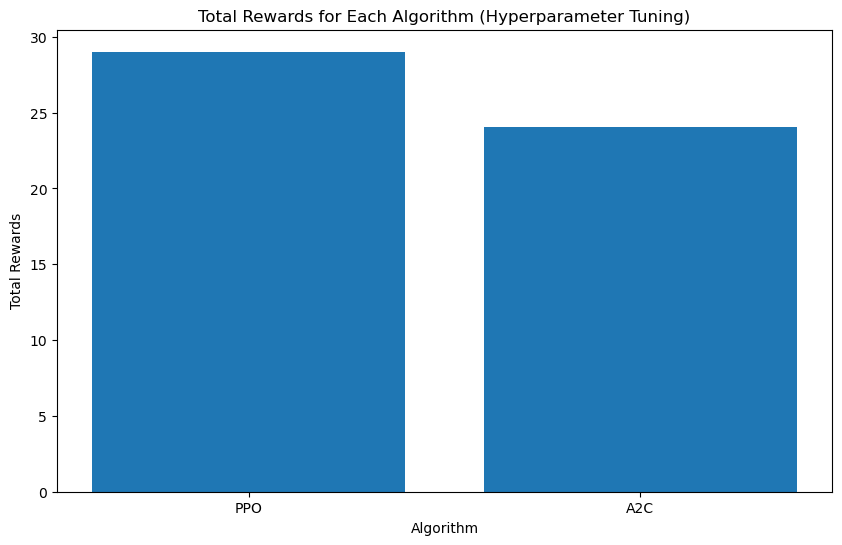

In [6]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import PPO, A2C, DDPG
from stable_baselines3.common.vec_env import DummyVecEnv
from gym import Env
from gym.spaces import Discrete, Box

# Define function to calculate RSI (for example feature engineering)
def compute_rsi(prices, period=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Example of adding technical indicators (Moving Average and RSI)
stock_data['SMA'] = stock_data['Close'].rolling(window=10).mean()  # 10-period Simple Moving Average
stock_data['RSI'] = compute_rsi(stock_data['Close'])  # Add RSI feature


class StockTradingEnv(Env):
    def __init__(self, stock_data, seq_len=10):
        super(StockTradingEnv, self).__init__()
        self.seq_len = seq_len
        self.current_step = 0
        self.done = False

        # Preprocess stock data
        scaler = MinMaxScaler()
        stock_data[['Close', 'sentiment']] = scaler.fit_transform(stock_data[['Close', 'sentiment']])
        self.stock_data = stock_data

        # Define action space and observation space
        self.action_space = Discrete(3)  # Actions: Buy, Hold, Sell
        self.observation_space = Box(
            low=0, high=1, shape=(seq_len, 2), dtype=np.float32
        )  # Observations: [Close, sentiment]

        # Initialize state
        self.state = self._next_observation()

    def _next_observation(self):
        # Make sure we are not going out of bounds
        if self.current_step + self.seq_len <= len(self.stock_data):
            obs = self.stock_data.iloc[
                self.current_step:self.current_step + self.seq_len
            ][['Close', 'sentiment']].to_numpy()
            return obs
        else:
            return np.zeros((self.seq_len, 2))  # Return an array of zeros if we're at the end of the dataset

    def step(self, action):
        self.current_step += 1
        if self.current_step >= len(self.stock_data) - self.seq_len:
            self.done = True
        else:
            self.done = False

        reward = 0
        if action == 0:  # Buy
            reward = self.stock_data.iloc[self.current_step]['Close'] - self.stock_data.iloc[self.current_step - 1]['Close']
        elif action == 2:  # Sell
            reward = self.stock_data.iloc[self.current_step - 1]['Close'] - self.stock_data.iloc[self.current_step]['Close']

        self.state = self._next_observation()
        return self.state, reward, self.done, {}

    def reset(self):
        self.current_step = 0
        self.done = False
        return self._next_observation()



# Simulated stock data
stock_data = pd.DataFrame({
    "Close": np.random.random(100),
    "sentiment": np.random.random(100)
})

# Clean and verify data
stock_data = stock_data.replace([np.inf, -np.inf], np.nan).dropna()

# Create a function to wrap your custom environment in DummyVecEnv
def create_env(stock_data):
    return StockTradingEnv(stock_data)

# Environment setup
vec_env = DummyVecEnv([lambda: StockTradingEnv(stock_data)])

# Hyperparameter tuning for PPO and A2C
algorithms = {
    "PPO": PPO("MlpPolicy", vec_env, verbose=1, learning_rate=5e-5, n_steps=512, batch_size=64, gamma=0.99, gae_lambda=0.95),
    "A2C": A2C("MlpPolicy", vec_env, verbose=1, learning_rate=5e-5, n_steps=512, gamma=0.99)
}

# Train and evaluate algorithms with tuned hyperparameters
results = {}
for name, model in algorithms.items():
    print(f"Training {name}...")
    model.learn(total_timesteps=20000)
    rewards = []
    obs = vec_env.reset()
    for _ in range(100):
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, info = vec_env.step(action)
        rewards.append(reward)
        if done:
            obs = vec_env.reset()
    results[name] = np.sum(rewards)
    print(f"Total reward for {name}: {results[name]}")

# Determine the best algorithm
best_algorithm = max(results, key=results.get)
print(f"Best algorithm: {best_algorithm}")

# Retrain the best algorithm on the full dataset
print(f"Retraining {best_algorithm}...")
best_model = algorithms[best_algorithm]
# Train for more timesteps for better exploration
best_model.learn(total_timesteps=100000)


# Plot results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title("Total Rewards for Each Algorithm (Hyperparameter Tuning)")
plt.xlabel("Algorithm")
plt.ylabel("Total Rewards")
plt.show()

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import numpy as np
import matplotlib.pyplot as plt
class DecisionTransformer(nn.Module):
    def __init__(self, state_size, action_size, seq_len, hidden_size=128):
        super(DecisionTransformer, self).__init__()
        self.fc = nn.Linear(state_size, hidden_size)  # Input size should be 20 (seq_len * num_features)
        self.transformer = nn.Transformer(d_model=hidden_size, nhead=4, num_encoder_layers=4)
        self.output_layer = nn.Linear(hidden_size, action_size)

    def forward(self, states):
        # Assuming your states have shape (batch_size, seq_len, num_features)
        batch_size, seq_len, num_features = states.shape  # Get shape of the input tensor

        # Reshape states to (batch_size, seq_len * num_features)
        states = states.reshape(batch_size, seq_len * num_features)  

        # Pass through fully connected layer
        hidden_states = torch.relu(self.fc(states))

        # Reshape back to (batch_size, seq_len, hidden_size)
        hidden_states = hidden_states.reshape(batch_size, seq_len, -1)

        
        # Pass through transformer
        # Use hidden_states as both src and tgt
        hidden_states = hidden_states.permute(1, 0, 2)
        transformer_output = self.transformer(hidden_states, hidden_states)  # Pass hidden_states as tgt
        
        # Get logits from the transformer output at the final timestep
        logits = self.output_layer(transformer_output[-1])
        
        return logits


def collect_trajectories(env, model, num_episodes=10):
    trajectories = []
    for _ in range(num_episodes):
        obs = env.reset()
        if isinstance(obs, tuple):
            obs = obs[0]
        done = False
        trajectory = {"states": [], "actions": [], "rewards": []}
        while not done:
            action, _states = model.predict(obs, deterministic=True)
            next_obs, reward, done, _ = env.step(action)
            trajectory["states"].append(obs)
            trajectory["actions"].append(action)
            trajectory["rewards"].append(reward)
            obs = next_obs
        
        # Reshape states for this trajectory
        trajectory["states"] = np.array(trajectory["states"]).reshape(len(trajectory["states"]), 1, -1)

        trajectories.append(trajectory)
    return trajectories

# Train the Decision Transformer model
def train_decision_transformer(trajectories, model, optimizer, epochs=20):
    for epoch in range(epochs):
        for traj in trajectories:
            # Convert states, actions, and rewards to tensors
            states = torch.tensor(traj["states"], dtype=torch.float32)
            actions = torch.tensor(traj["actions"], dtype=torch.long)
            rewards = torch.tensor(traj["rewards"], dtype=torch.float32)
            
            optimizer.zero_grad()
            
            # Forward pass
            logits = model(states)
            
            # Compute loss using CrossEntropyLoss
            loss = nn.CrossEntropyLoss()(logits, actions.squeeze())  # Squeeze actions tensor
            
            loss.backward()
            optimizer.step()
            
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")


# Collect trajectories from the trained PPO model
# Now use the trained PPO model to collect trajectories
ppo_model = algorithms["PPO"]  # Define the PPO model after training
trajectories = collect_trajectories(vec_env, ppo_model)
# Initialize Decision Transformer model and optimizer
state_size = vec_env.observation_space.shape[0] * vec_env.observation_space.shape[1]  # Get state_size from the environment's observation space
action_size = vec_env.action_space.n  # Get action_size from the environment's action space
seq_len = 10  # Length of sequence (number of timesteps)

# Fine-tune the Decision Transformer (DT) model
dt_model = DecisionTransformer(state_size, action_size, seq_len, hidden_size=256)  # Increased hidden size
optimizer = torch.optim.Adam(dt_model.parameters(), lr=1e-4, weight_decay=1e-5)
  # Lower learning rate for finer tuning

# Train the Decision Transformer on the collected trajectories
train_decision_transformer(trajectories, dt_model, optimizer, epochs=50)  # Increase epochs for better convergence


c:\Users\zeina\anaconda3\Lib\site-packages\torch\nn\modules\transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\zeina\AppData\Local\Temp\ipykernel_5568\650173940.py:68: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:264.)
  actions = torch.tensor(traj["actions"], dtype=torch.long)


Epoch 1/50, Loss: 0.34781986474990845
Epoch 2/50, Loss: 0.11699184030294418
Epoch 3/50, Loss: 0.06494054943323135
Epoch 4/50, Loss: 0.032979123294353485
Epoch 5/50, Loss: 0.00464047072455287
Epoch 6/50, Loss: 0.015651419758796692
Epoch 7/50, Loss: 0.0008735483861528337
Epoch 8/50, Loss: 0.003047764068469405
Epoch 9/50, Loss: 0.00602648314088583
Epoch 10/50, Loss: 0.05851883813738823
Epoch 11/50, Loss: 0.0006289070006459951
Epoch 12/50, Loss: 0.000798859924543649
Epoch 13/50, Loss: 0.007342192344367504
Epoch 14/50, Loss: 0.0024557483848184347
Epoch 15/50, Loss: 0.0017743174685165286
Epoch 16/50, Loss: 0.0007244118605740368
Epoch 17/50, Loss: 0.000468022539280355
Epoch 18/50, Loss: 0.000778201618231833
Epoch 19/50, Loss: 0.0012338552623987198
Epoch 20/50, Loss: 0.00041331956163048744
Epoch 21/50, Loss: 0.0005281114135868847
Epoch 22/50, Loss: 0.0003906119673047215
Epoch 23/50, Loss: 0.003247356740757823
Epoch 24/50, Loss: 0.0015647630207240582
Epoch 25/50, Loss: 0.00030451800557784736
Ep

In [8]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# Variables to hold predicted actions and true labels
predicted_actions = []
true_labels = []

# Iterate over the stock data, starting after the initial seq_len (since the first few steps require history)
for i in range(10, len(stock_data)):  # Start from seq_len to avoid out-of-bounds
    # Create a window of seq_len observations (use the last 10 steps as input to the model)
    observation = stock_data.iloc[i-10:i][['Close', 'sentiment']].values
    observation = np.expand_dims(observation, axis=0)  # Add batch dimension (shape: [1, seq_len, num_features])

    # Get the predicted action from the model
    action, _ = best_model.predict(observation, deterministic=True)
    predicted_actions.append(action[0])  # Extract the first action since it's a batch

    # Generate true actions based on price movement (buy if price goes up, sell if price goes down)
    if stock_data['Close'].iloc[i] > stock_data['Close'].iloc[i - 1]:
        true_labels.append(0)  # Buy signal (0)
    else:
        true_labels.append(2)  # Sell signal (2)

# Now you can evaluate the model's performance
accuracy = accuracy_score(true_labels, predicted_actions)
print(f"Accuracy on unseen data: {accuracy:.4f}")

# Calculate F1 score (Weighted average)
f1 = f1_score(true_labels, predicted_actions, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_actions)
print(f"Confusion Matrix:\n{cm}")  

Accuracy on unseen data: 0.5556
F1 Score: 0.5547
Confusion Matrix:
[[27 18]
 [22 23]]


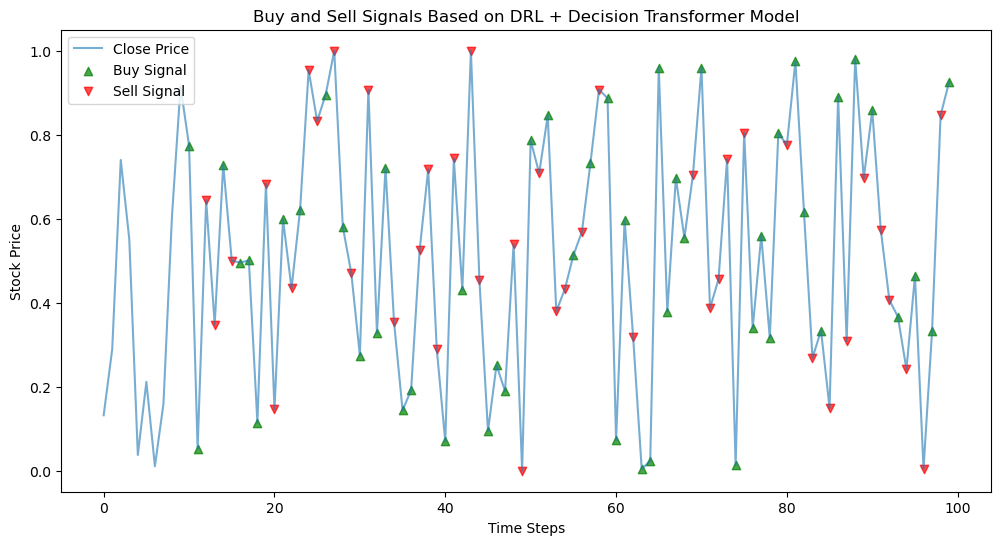

In [9]:
# Plotting the Buy and Sell signals based on model predictions
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label="Close Price", alpha=0.6)

# Identifying buy and sell signals based on model predictions
buy_signals = [i + 10 for i, action in enumerate(predicted_actions) if action == 0]  # Buy action (0)
sell_signals = [i + 10 for i, action in enumerate(predicted_actions) if action == 2]  # Sell action (2)

# Plot Buy and Sell signals
plt.scatter(buy_signals, stock_data['Close'].iloc[buy_signals], color='green', label='Buy Signal', marker='^', alpha=0.7)
plt.scatter(sell_signals, stock_data['Close'].iloc[sell_signals], color='red', label='Sell Signal', marker='v', alpha=0.7)

# Customize the plot
plt.title("Buy and Sell Signals Based on DRL + Decision Transformer Model")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

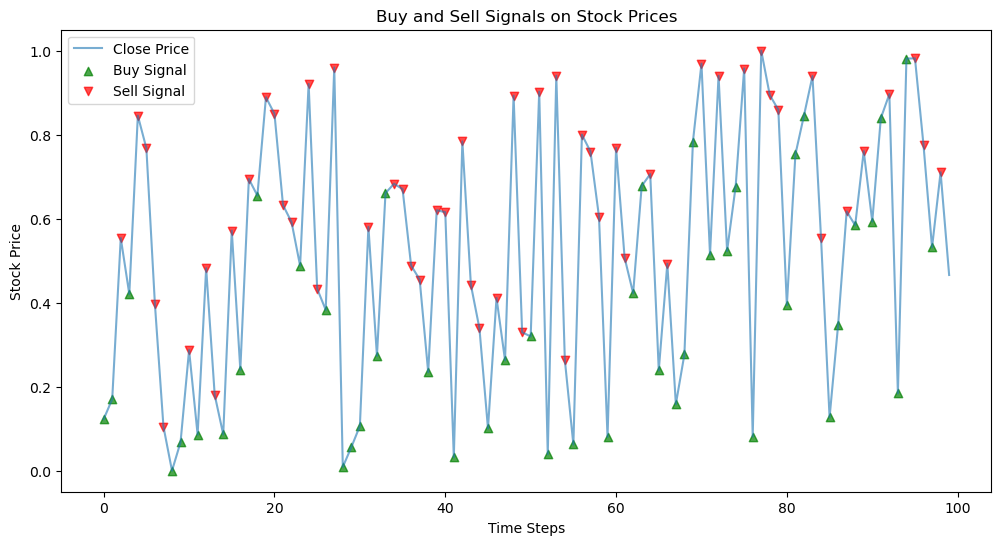

In [10]:
import matplotlib.pyplot as plt
# (Example strategy: Buy when price goes up, sell when price goes down)
actions = []
for i in range(1, len(stock_data)):
    if stock_data['Close'].iloc[i] > stock_data['Close'].iloc[i - 1]:
        actions.append(0)  # Buy signal (0)
    else:
        actions.append(2)  # Sell signal (2)
true_labels = []
for i in range(1, len(stock_data)):
    if stock_data['Close'].iloc[i] > stock_data['Close'].iloc[i - 1]:
        true_labels.append(0)  # Buy signal (0)
    else:
        true_labels.append(2)  # Sell signal (2)


# Plotting
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label="Close Price", alpha=0.6)

# Identifying buy and sell signals
buy_signals = [i for i, action in enumerate(actions) if action == 0]  # Buy action (0)
sell_signals = [i for i, action in enumerate(actions) if action == 2]  # Sell action (2)

# Plot Buy and Sell signals
plt.scatter(buy_signals, stock_data['Close'].iloc[buy_signals], color='green', label='Buy Signal', marker='^', alpha=0.7)
plt.scatter(sell_signals, stock_data['Close'].iloc[sell_signals], color='red', label='Sell Signal', marker='v', alpha=0.7)

# Customize the plot
plt.title("Buy and Sell Signals on Stock Prices")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.show()  

Using cpu device


c:\Users\zeina\anaconda3\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
Training PPO...
----------------------------
| time/              |     |
|    fps             | 834 |
|    iterations      | 1   |
|    time_elapsed    | 0   |
|    total_timesteps | 512 |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 665          |
|    iterations           | 2            |
|    time_elapsed         | 1            |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 0.0003430379 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.1         |
|    explained_variance   | -0.0214      |
|    learning_rate        | 5e-05        |
|    loss                 | 0.558        |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00185     |
|    value_loss           | 1.22         |
---------------------------------

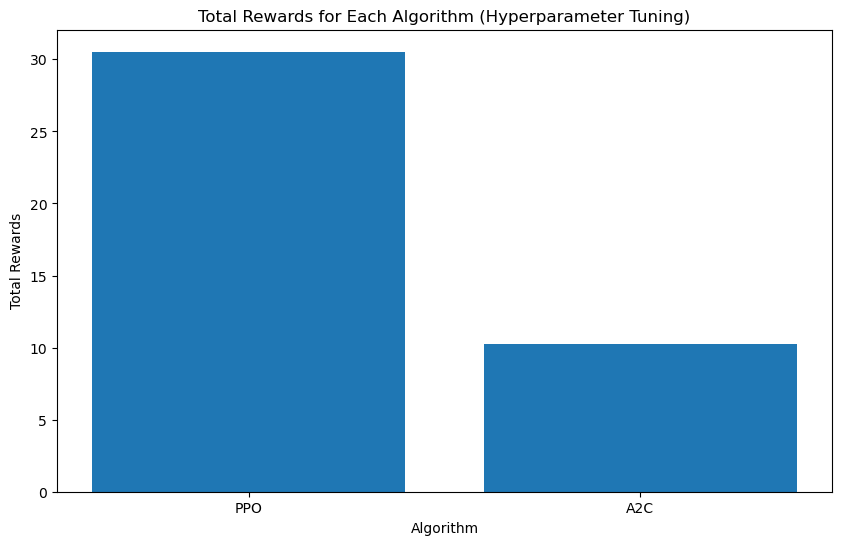

In [8]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from stable_baselines3 import PPO, A2C, DDPG
from stable_baselines3.common.vec_env import DummyVecEnv
from gym import Env
from gym.spaces import Discrete, Box

# Define function to calculate RSI (for example feature engineering)
def compute_rsi(prices, period=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Simulated stock data
stock_data = pd.DataFrame({
    "Close": np.random.random(100),
    "sentiment": np.random.random(100)
})

# Example of adding technical indicators (Moving Average and RSI)
stock_data['SMA'] = stock_data['Close'].rolling(window=10).mean()  # 10-period Simple Moving Average
stock_data['RSI'] = compute_rsi(stock_data['Close'])  # Add RSI feature

# Clean and verify data
stock_data = stock_data.replace([np.inf, -np.inf], np.nan).dropna()

class StockTradingEnv(Env):
    def __init__(self, stock_data, seq_len=10):
        super(StockTradingEnv, self).__init__()
        self.seq_len = seq_len
        self.current_step = 0
        self.done = False

        # Preprocess stock data
        scaler = MinMaxScaler()
        stock_data[['Close', 'sentiment']] = scaler.fit_transform(stock_data[['Close', 'sentiment']])
        self.stock_data = stock_data

        # Define action space and observation space
        self.action_space = Discrete(3)  # Actions: Buy, Hold, Sell
        self.observation_space = Box(
            low=0, high=1, shape=(seq_len, 2), dtype=np.float32
        )  # Observations: [Close, sentiment]

        # Initialize state
        self.state = self._next_observation()

    def _next_observation(self):
        if self.current_step + self.seq_len <= len(self.stock_data):
            obs = self.stock_data.iloc[
                self.current_step:self.current_step + self.seq_len
            ][['Close', 'sentiment']].to_numpy()
            return obs
        else:
            return np.zeros((self.seq_len, 2))  # Return an array of zeros if we're at the end of the dataset

    def step(self, action):
        self.current_step += 1
        if self.current_step >= len(self.stock_data) - self.seq_len:
            self.done = True
        else:
            self.done = False

        reward = 0
        if action == 0:  # Buy
            reward = self.stock_data.iloc[self.current_step]['Close'] - self.stock_data.iloc[self.current_step - 1]['Close']
        elif action == 2:  # Sell
            reward = self.stock_data.iloc[self.current_step - 1]['Close'] - self.stock_data.iloc[self.current_step]['Close']

        self.state = self._next_observation()
        return self.state, reward, self.done, {}

    def reset(self):
        self.current_step = 0
        self.done = False
        return self._next_observation()

# Create a function to wrap your custom environment in DummyVecEnv
def create_env(stock_data):
    return StockTradingEnv(stock_data)

# Environment setup
vec_env = DummyVecEnv([lambda: StockTradingEnv(stock_data)])

# Hyperparameter tuning for PPO and A2C
algorithms = {
    "PPO": PPO("MlpPolicy", vec_env, verbose=1, learning_rate=5e-5, n_steps=512, batch_size=64, gamma=0.99, gae_lambda=0.95),
    "A2C": A2C("MlpPolicy", vec_env, verbose=1, learning_rate=5e-5, n_steps=512, gamma=0.99)
}

# Train and evaluate algorithms with tuned hyperparameters
results = {}
for name, model in algorithms.items():
    print(f"Training {name}...")
    model.learn(total_timesteps=20000)
    rewards = []
    obs = vec_env.reset()
    for _ in range(100):
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, info = vec_env.step(action)
        rewards.append(reward)
        if done:
            obs = vec_env.reset()
    results[name] = np.sum(rewards)
    print(f"Total reward for {name}: {results[name]}")

# Determine the best algorithm
best_algorithm = max(results, key=results.get)
print(f"Best algorithm: {best_algorithm}")

# Retrain the best algorithm on the full dataset
print(f"Retraining {best_algorithm}...")
best_model = algorithms[best_algorithm]
best_model.learn(total_timesteps=100000)

# Plot results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title("Total Rewards for Each Algorithm (Hyperparameter Tuning)")
plt.xlabel("Algorithm")
plt.ylabel("Total Rewards")
plt.show()

In [9]:
class DualAttentionDecisionTransformer(nn.Module):
    def __init__(self, state_size, action_size, seq_len, hidden_size=128):
        super(DualAttentionDecisionTransformer, self).__init__()

        # Stock attention branch
        self.stock_fc = nn.Linear(state_size, hidden_size)
        self.stock_transformer = nn.Transformer(d_model=hidden_size, nhead=4, num_encoder_layers=4)

        # News attention branch
        self.news_fc = nn.Linear(state_size, hidden_size)
        self.news_transformer = nn.Transformer(d_model=hidden_size, nhead=4, num_encoder_layers=4)

        # Fusion and output layers
        self.fusion_fc = nn.Linear(hidden_size * 2, hidden_size)
        self.output_layer = nn.Linear(hidden_size, action_size)

    def forward(self, stock_states, news_states):
        # Ensure stock_states and news_states have the correct shape
        #print(f"Stock states shape before transformer: {stock_states.shape}")
        #print(f"News states shape before transformer: {news_states.shape}")

        # Unpack batch size, sequence length, and feature size
        batch_size, seq_len, feature_size, _ = stock_states.size()  # Unpacking dimensions

        # Reshape stock_states and news_states to match (batch_size * seq_len, feature_size)
        stock_states = stock_states.view(batch_size * seq_len, feature_size * 2)  # Flatten to (batch_size * seq_len, features)
        news_states = news_states.view(batch_size * seq_len, feature_size * 2)    # Flatten to (batch_size * seq_len, features)

        # Apply linear transformations to match the hidden size
        stock_states = self.stock_fc(stock_states)  # Linear transformation to hidden_size
        news_states = self.news_fc(news_states)     # Linear transformation to hidden_size

        # Reshape for transformer input (seq_len, batch_size, hidden_size)
        stock_states = stock_states.view(seq_len, batch_size, -1)  # (seq_len, batch_size, hidden_size)
        news_states = news_states.view(seq_len, batch_size, -1)    # (seq_len, batch_size, hidden_size)

        # Apply transformer (using stock_states and news_states as both src and tgt)
        stock_states = self.stock_transformer(stock_states, stock_states)  # Transformer processing (src, tgt)
        news_states = self.news_transformer(news_states, news_states)      # Transformer processing (src, tgt)

        # Combine the last output state from both stock and news
        combined_states = torch.cat([stock_states[-1], news_states[-1]], dim=-1)  # Concatenate the last state from both

        # Fusion layer
        combined_states = self.fusion_fc(combined_states)

        # Output layer for action prediction
        logits = self.output_layer(combined_states)

        return logits



# Collect trajectories from the trained PPO model
def collect_trajectories(env, model, num_episodes=10):
    trajectories = []
    for _ in range(num_episodes):
        obs = env.reset()
        if isinstance(obs, tuple):
            obs = obs[0]
        done = False
        trajectory = {"stock_states": [], "news_states": [], "actions": [], "rewards": []}
        while not done:
            action, _states = model.predict(obs, deterministic=True)
            next_obs, reward, done, _ = env.step(action)
            trajectory["stock_states"].append(obs)
            trajectory["news_states"].append(obs)  # Assuming news is part of the observation
            trajectory["actions"].append(action)
            trajectory["rewards"].append(reward)
            obs = next_obs

        trajectory["stock_states"] = np.array(trajectory["stock_states"])  # Ensure consistency
        trajectory["news_states"] = np.array(trajectory["news_states"])  # Ensure consistency
        trajectories.append(trajectory)
    return trajectories


# Initialize Dual Attention Decision Transformer model and optimizer
state_size = vec_env.observation_space.shape[0] * vec_env.observation_space.shape[1]  # Get state_size
action_size = vec_env.action_space.n  # Get action_size
seq_len = 10  # Length of sequence

dadt_model = DualAttentionDecisionTransformer(state_size, action_size, seq_len, hidden_size=256)  # Increased hidden size
optimizer = torch.optim.Adam(dadt_model.parameters(), lr=1e-4, weight_decay=1e-5)


# Collect trajectories and train the Dual Attention Decision Transformer
trajectories = collect_trajectories(vec_env, best_model)

def train_decision_transformer(trajectories, model, optimizer, epochs=50):
    print("Starting training loop...")

    for epoch in range(epochs):
        epoch_loss = 0  # Track loss for each epoch
        for trajectory in trajectories:
            stock_states = torch.tensor(trajectory["stock_states"], dtype=torch.float32)
            news_states = torch.tensor(trajectory["news_states"], dtype=torch.float32)
            actions = torch.tensor(trajectory["actions"], dtype=torch.long)

            # Add batch dimension if not present
            if len(stock_states.shape) == 2:  # (seq_len, features)
                stock_states = stock_states.unsqueeze(0)  # (1, seq_len, features)
            if len(news_states.shape) == 2:  # (seq_len, features)
                news_states = news_states.unsqueeze(0)  # (1, seq_len, features)

            # Forward pass
            logits = model(stock_states, news_states)

            # Loss computation (cross-entropy loss for action prediction)
            loss = nn.CrossEntropyLoss()(logits.view(-1, logits.size(-1)), actions.view(-1))

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Accumulate loss for the epoch
            epoch_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(trajectories)}")  # Print average loss per epoch

# Calling the training function
train_decision_transformer(trajectories, dadt_model, optimizer, epochs=50)


c:\Users\zeina\anaconda3\Lib\site-packages\torch\nn\modules\transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Starting training loop...


C:\Users\zeina\AppData\Local\Temp\ipykernel_10156\951106546.py:98: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:264.)
  actions = torch.tensor(trajectory["actions"], dtype=torch.long)


Epoch 1/50, Loss: 0.5765874326229096
Epoch 2/50, Loss: 0.12965533807873725
Epoch 3/50, Loss: 0.04980700262822211
Epoch 4/50, Loss: 0.02990837483666837
Epoch 5/50, Loss: 0.017305274086538702
Epoch 6/50, Loss: 0.017561592278070748
Epoch 7/50, Loss: 0.0025222979951649905
Epoch 8/50, Loss: 0.0019921646977309137
Epoch 9/50, Loss: 0.001994169733370654
Epoch 10/50, Loss: 0.001003737497376278
Epoch 11/50, Loss: 0.0006192778731929138
Epoch 12/50, Loss: 0.0004983381193596869
Epoch 13/50, Loss: 0.0006171964196255431
Epoch 14/50, Loss: 0.0004098183591850102
Epoch 15/50, Loss: 0.0003670327743748203
Epoch 16/50, Loss: 0.00021586827206192537
Epoch 17/50, Loss: 0.00023744721547700465
Epoch 18/50, Loss: 0.00022521235659951345
Epoch 19/50, Loss: 0.00020841772347921506
Epoch 20/50, Loss: 0.0004936051613185555
Epoch 21/50, Loss: 0.0002540018045692705
Epoch 22/50, Loss: 0.0003602305761887692
Epoch 23/50, Loss: 0.00020030774176120757
Epoch 24/50, Loss: 0.00016550892614759506
Epoch 25/50, Loss: 0.00030400036

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize lists to store predictions and true labels
predicted_actions = []
true_labels = []

# Iterate through the data for evaluation
for i in range(10, len(stock_data)):
    observation = stock_data.iloc[i-10:i][['Close', 'sentiment']].values
    observation = np.expand_dims(observation, axis=0)
    
    # Predict the action using the model (deterministic for evaluation)
    action, _ = best_model.predict(observation, deterministic=True)
    predicted_actions.append(action[0])

    # Define the true label based on price change
    if stock_data['Close'].iloc[i] > stock_data['Close'].iloc[i - 1]:
        true_labels.append(0)  # 0 for price increase
    else:
        true_labels.append(2)  # 2 for price decrease

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_actions)
precision = precision_score(true_labels, predicted_actions, average='weighted')
recall = recall_score(true_labels, predicted_actions, average='weighted')
f1 = f1_score(true_labels, predicted_actions, average='weighted')

# Print metrics
print(f"Accuracy on unseen data: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_actions)
print(f"Confusion Matrix:\n{cm}")

Accuracy on unseen data: 0.4675
Precision: 0.4679
Recall: 0.4675
F1 Score: 0.4670
Confusion Matrix:
[[19 19]
 [22 17]]


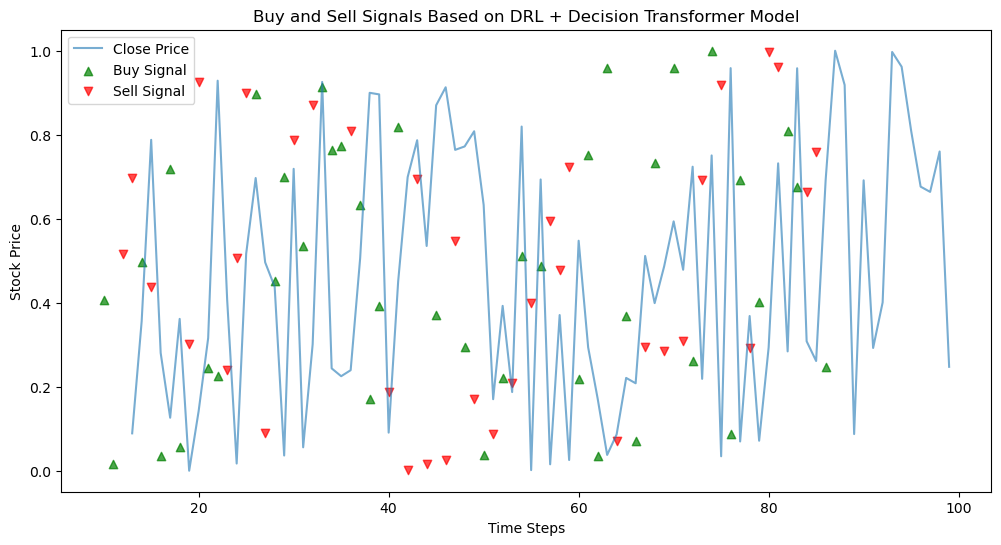

In [14]:
import matplotlib.pyplot as plt

# Generate figure
plt.figure(figsize=(12, 6))

# Plot the close price of the stock
plt.plot(stock_data['Close'], label="Close Price", alpha=0.6)

# Identify Buy and Sell signals from the predicted actions
# The predicted actions are offset by 10 steps due to the sliding window
buy_signals = [i + 10 for i, action in enumerate(predicted_actions) if action == 0]  # Buy signal when action == 0
sell_signals = [i + 10 for i, action in enumerate(predicted_actions) if action == 2]  # Sell signal when action == 2

# Scatter plot for buy signals (green) and sell signals (red)
plt.scatter(buy_signals, stock_data['Close'].iloc[buy_signals], color='green', label='Buy Signal', marker='^', alpha=0.7)
plt.scatter(sell_signals, stock_data['Close'].iloc[sell_signals], color='red', label='Sell Signal', marker='v', alpha=0.7)

# Title and labels
plt.title("Buy and Sell Signals Based on DRL + Decision Transformer Model")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()

# Show the plot
plt.show()


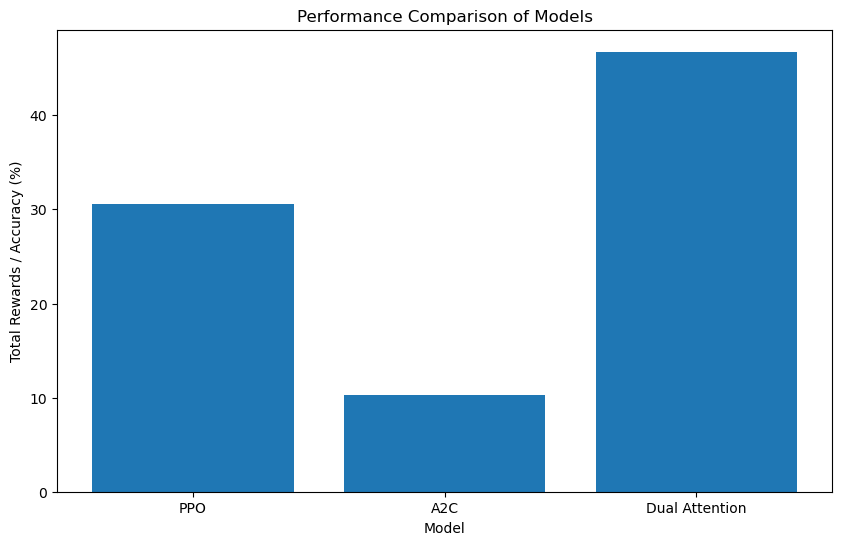

In [12]:
# Final comparison of models
plt.figure(figsize=(10, 6))
plt.bar(["PPO", "A2C", "Dual Attention"], [results["PPO"], results["A2C"], accuracy * 100])
plt.title("Performance Comparison of Models")
plt.ylabel("Total Rewards / Accuracy (%)")
plt.xlabel("Model")
plt.show()


In [6]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from gym import Env
from gym.spaces import Discrete, Box

# Feature Engineering
def compute_rsi(prices, period=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Simulated stock data
stock_data = pd.DataFrame({
    "Close": np.random.random(100),
    "sentiment": np.random.randint(0, 3, 100)  # Example sentiment values
})

# Add technical indicators
stock_data['SMA'] = stock_data['Close'].rolling(window=10).mean()
stock_data['RSI'] = compute_rsi(stock_data['Close'])
stock_data = stock_data.replace([np.inf, -np.inf], np.nan).dropna()

# Data Scaling
scaler = MinMaxScaler()
stock_data[['Close', 'sentiment']] = scaler.fit_transform(stock_data[['Close', 'sentiment']])

# Custom Stock Trading Environment
class StockTradingEnv(Env):
    def __init__(self, stock_data, seq_len=10):
        super(StockTradingEnv, self).__init__()
        self.seq_len = seq_len
        self.current_step = 0
        self.done = False
        self.stock_data = stock_data

        # Action space: [Buy, Hold, Sell]
        self.action_space = Discrete(3)

        # Observation space: [Close, Sentiment]
        self.observation_space = Box(low=0, high=1, shape=(seq_len, 2), dtype=np.float32)
        self.state = self._next_observation()

    def _next_observation(self):
        if self.current_step + self.seq_len <= len(self.stock_data):
            obs = self.stock_data.iloc[self.current_step:self.current_step + self.seq_len][['Close', 'sentiment']].to_numpy()
            return obs
        else:
            return np.zeros((self.seq_len, 2))

    def step(self, action):
        self.current_step += 1
        if self.current_step >= len(self.stock_data) - self.seq_len:
            self.done = True
        else:
            self.done = False

        reward = 0
        if action == 0:  # Buy
            reward = self.stock_data.iloc[self.current_step]['Close'] - self.stock_data.iloc[self.current_step - 1]['Close']
        elif action == 2:  # Sell
            reward = self.stock_data.iloc[self.current_step - 1]['Close'] - self.stock_data.iloc[self.current_step]['Close']

        self.state = self._next_observation()
        return self.state, reward, self.done, {}

    def reset(self):
        self.current_step = 0
        self.done = False
        return self._next_observation()

In [ ]:
import torch
import torch.nn as nn
import numpy as np

class DualAttentionDecisionTransformer(nn.Module):
    def __init__(self, state_size, action_size, seq_len, hidden_size):
        super(DualAttentionDecisionTransformer, self).__init__()
        self.hidden_size = hidden_size
        self.seq_len = seq_len
        self.state_proj = nn.Linear(state_size, hidden_size)
        self.action_proj = nn.Linear(action_size, hidden_size)
        self.transformer = nn.Transformer(hidden_size, nhead=4, num_encoder_layers=2)
        self.output_layer = nn.Linear(hidden_size, action_size)

    def forward(self, stock_states, news_states):
        batch_size = stock_states.shape[0]  # Batch size

        # Project stock and news states to the hidden size
        stock_states = self.state_proj(stock_states)
        news_states = self.state_proj(news_states)

        # Pass stock and news states separately to the transformer
        # The transformer expects the same feature size for both src and tgt
        transformer_output = self.transformer(stock_states, news_states)

        # Use the last output token for prediction
        logits = self.output_layer(transformer_output[-1])
        return logits

# Data preparation (make sure tensors are correctly prepared)
trajectories = [
    {
        "stock_states": np.random.rand(10, 4),  # Shape: (seq_len, state_size)
        "news_states": np.random.rand(10, 4),
        "actions": np.random.randint(0, 2, size=(10,))
    }
    for _ in range(100)
]

# Convert numpy arrays to tensors and add batch dimension
for trajectory in trajectories:
    trajectory["stock_states"] = torch.tensor(trajectory["stock_states"], dtype=torch.float32).unsqueeze(0)  # Add batch dimension
    trajectory["news_states"] = torch.tensor(trajectory["news_states"], dtype=torch.float32).unsqueeze(0)
    trajectory["actions"] = torch.tensor(trajectory["actions"], dtype=torch.long)

# Training function
def train_decision_transformer(trajectories, model, optimizer, epochs=10):
    for epoch in range(epochs):
        epoch_loss = 0
        for trajectory in trajectories:
            stock_states = trajectory["stock_states"]
            news_states = trajectory["news_states"]
            actions = trajectory["actions"]

            optimizer.zero_grad()
            logits = model(stock_states, news_states)

            # Reshape logits to (batch_size * seq_len, action_size) and actions to (batch_size * seq_len,)
            logits = logits.view(-1, logits.size(-1))
            actions = actions.view(-1)

            # Calculate the loss
            loss = nn.CrossEntropyLoss()(logits, actions)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch {epoch + 1}, Loss: {epoch_loss / len(trajectories):.4f}")

# Initialize model and optimizer
state_size = 4  # Size of input state
action_size = 2  # Number of possible actions
seq_len = 10  # Sequence length
hidden_size = 128  # Size of transformer hidden layer

model = DualAttentionDecisionTransformer(state_size=state_size, action_size=action_size, seq_len=seq_len, hidden_size=hidden_size)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_decision_transformer(trajectories, model, optimizer)

# Dummy environment for evaluation
class DummyEnv:
    def reset(self):
        return {
            "stock_states": np.random.rand(seq_len, state_size),
            "news_states": np.random.rand(seq_len, state_size),
        }

    def step(self, action):
        reward = np.random.rand()  # Random reward
        done = np.random.rand() > 0.95  # Random termination condition
        return self.reset(), reward, done, {}

env = DummyEnv()


Epoch 1, Loss: 0.7433
Epoch 2, Loss: 0.7039
Epoch 3, Loss: 0.6994
Epoch 4, Loss: 0.6967
Epoch 5, Loss: 0.6982
Epoch 6, Loss: 0.6985
Epoch 7, Loss: 0.6998
Epoch 8, Loss: 0.7000
Epoch 9, Loss: 0.6997
Epoch 10, Loss: 0.6991


In [22]:
# Evaluate the model
def evaluate_model(model, env):
    obs = env.reset()
    rewards = []
    done = False
    while not done:
        stock_states = torch.tensor(obs["stock_states"], dtype=torch.float32).unsqueeze(0)
        news_states = torch.tensor(obs["news_states"], dtype=torch.float32).unsqueeze(0)

        # Get logits for all time steps, then select the action for the last time step
        logits = model(stock_states, news_states)
        action = logits.argmax(dim=-1)  # Get the action with the highest logit
        action = action[-1]  # Select the action at the last time step

        # Call the environment step with the action
        next_obs, reward, done, _ = env.step(action.item())  # Convert tensor to scalar
        rewards.append(reward)
        obs = next_obs
    accuracy = sum(rewards) / len(rewards)
    return accuracy, np.mean(rewards)

# Evaluate the model
accuracy, mean_reward = evaluate_model(model, env)
print(f"Evaluation Accuracy: {accuracy:.2f}, Mean Reward: {mean_reward:.2f}")


Evaluation Accuracy: 0.51, Mean Reward: 0.51


In [17]:
import torch
import torch.nn as nn
import numpy as np
import gym
from gym import spaces
from stable_baselines3 import PPO, A2C
from stable_baselines3.common.vec_env import DummyVecEnv
import matplotlib.pyplot as plt


# Define the StockTransformer model
class StockTransformer(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(StockTransformer, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Define the layers
        self.embedding = nn.Linear(input_size, hidden_size)
        self.transformer = nn.Transformer(
            d_model=hidden_size,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers,
            dim_feedforward=hidden_size * 4,
            dropout=0.1
        )
        self.fc_out = nn.Linear(hidden_size, hidden_size)

    def forward(self, x):
        # Ensure the input is in the correct shape (batch_size, seq_len, input_size)
        if len(x.size()) == 2:  # If the input is 2D (seq_len, input_size), add batch dimension
            x = x.unsqueeze(0)  # Shape becomes (1, seq_len, input_size)

        batch_size, seq_len, input_size = x.size()

        # Pass through the embedding layer
        x = self.embedding(x)  # Shape becomes (batch_size, seq_len, hidden_size)

        # Reorder to (seq_len, batch_size, hidden_size) for transformer
        x = x.permute(1, 0, 2)  # (seq_len, batch_size, hidden_size)

        # Apply transformer
        x = self.transformer(x, x)

        # Get the output for the batch
        x = x.mean(dim=0)  # Shape becomes (batch_size, hidden_size)
        return self.fc_out(x)


# Decision Transformer for news data
class NewsTransformer(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(NewsTransformer, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.embedding = nn.Linear(input_size, hidden_size)

        # Corrected Transformer initialization
        self.transformer = nn.Transformer(
            d_model=hidden_size,
            num_encoder_layers=num_layers, 
            num_decoder_layers=num_layers,
            dim_feedforward=hidden_size * 4,
            dropout=0.1
        )
        self.fc_out = nn.Linear(hidden_size, hidden_size)

    def forward(self, x):
        batch_size, seq_len, input_size = x.size()

        # Pass through the embedding layer
        x = self.embedding(x)  # Shape becomes (batch_size, seq_len, hidden_size)

        # Reorder to (seq_len, batch_size, hidden_size) for the transformer
        x = x.permute(1, 0, 2)  # (seq_len, batch_size, hidden_size)

        # Apply transformer
        x = self.transformer(x, x)

        # Get the output for the batch
        x = x.mean(dim=0)  # Shape becomes (batch_size, hidden_size)
        return self.fc_out(x)


# Dummy data (replace with actual data)
stock_data = np.random.rand(100, 10)  # 100 steps, 10 features per step
news_data = np.random.rand(100, 10)  # 100 steps, 10 features per step

# Convert the data to torch tensors with shape (batch_size, seq_len, input_size)
stock_tensor = torch.tensor(stock_data, dtype=torch.float32).unsqueeze(0)  # Adding batch dimension
news_tensor = torch.tensor(news_data, dtype=torch.float32).unsqueeze(0)  # Adding batch dimension

# Initialize both transformers
stock_transformer = StockTransformer(input_size=10, hidden_size=64, num_layers=2)
news_transformer = NewsTransformer(input_size=10, hidden_size=64, num_layers=2)

# Pass through the transformers to get outputs
stock_output = stock_transformer(stock_tensor)
news_output = news_transformer(news_tensor)

print("Stock Transformer Output:", stock_output.shape)
print("News Transformer Output:", news_output.shape)


# Trading Environment
class TradingEnvironment(gym.Env):
    def __init__(self, stock_data, news_data, stock_transformer, news_transformer):
        super(TradingEnvironment, self).__init__()

        self.stock_data = stock_data
        self.news_data = news_data
        self.stock_transformer = stock_transformer
        self.news_transformer = news_transformer
        self.current_step = 0

        # Action space: 0 = Buy, 1 = Sell, 2 = Hold
        self.action_space = spaces.Discrete(3)

        # Observation space: the output of both transformers combined
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(stock_transformer.hidden_size * 2,), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        return self._get_observation()

    def _get_observation(self):
    # Get the current stock and news data at the current step
     stock_batch = torch.tensor(self.stock_data[self.current_step], dtype=torch.float32).unsqueeze(0)
     news_batch = torch.tensor(self.news_data[self.current_step], dtype=torch.float32).unsqueeze(0)  # Adding batch dimension

    # Pass them through the respective transformers
     stock_output = self.stock_transformer(stock_batch).detach().numpy()
     news_output = self.news_transformer(news_batch).detach().numpy()

    # Combine the outputs of both transformers to form the final observation
     combined_output = np.concatenate([stock_output, news_output], axis=-1)
     return combined_output


    def step(self, action):
        prev_step = self.current_step
        self.current_step += 1
        done = False

        if self.current_step >= len(self.stock_data) - 1:
            done = True
            self.current_step = 0

        reward = self._get_reward(action)
        observation = self._get_observation()

        return observation, reward, done, {}

    def _get_reward(self, action):
        stock_batch = self.stock_data[self.current_step]
        stock_price_change = stock_batch[-1] - stock_batch[0]

        if action == 0:  # Buy
            reward = stock_price_change if stock_price_change > 0 else -1
        elif action == 1:  # Sell
            reward = -stock_price_change if stock_price_change < 0 else -1
        else:  # Hold
            reward = 0

        return reward


# Wrap the environment for compatibility with Stable-Baselines3
env = DummyVecEnv([lambda: TradingEnvironment(stock_data, news_data, stock_transformer, news_transformer)])

# Instantiate PPO and A2C models
ppo_model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="./ppo_trading/")
a2c_model = A2C("MlpPolicy", env, verbose=1, tensorboard_log="./a2c_trading/")

# Train PPO model
ppo_model.learn(total_timesteps=10000)

# Train A2C model
a2c_model.learn(total_timesteps=10000)


# Function to evaluate trading agents
def evaluate_trading_agent(model, env):
    obs = env.reset()
    done = False
    rewards = []
    actions = []

    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, _ = env.step(action)
        rewards.append(reward)
        actions.append(action)

    return rewards, actions


# Evaluate both models
ppo_rewards, ppo_actions = evaluate_trading_agent(ppo_model, env)
a2c_rewards, a2c_actions = evaluate_trading_agent(a2c_model, env)


# Function to plot Buy/Sell decisions
def plot_actions(actions, title="Trading Actions"):
    actions_map = {0: "Buy", 1: "Sell", 2: "Hold"}
    action_labels = [actions_map[a] for a in actions]

    plt.figure(figsize=(10, 6))
    plt.plot(action_labels)
    plt.title(title)
    plt.xlabel("Step")
    plt.ylabel("Action")
    plt.show()


# Plot the buy/sell decisions for both PPO and A2C
plot_actions(ppo_actions, "PPO Trading Actions")
plot_actions(a2c_actions, "A2C Trading Actions")


Stock Transformer Output: torch.Size([1, 64])
News Transformer Output: torch.Size([1, 64])
Using cpu device
Using cpu device


ValueError: not enough values to unpack (expected 3, got 2)

In [14]:
class TradingEnvironment(gym.Env):
    def __init__(self, stock_data, news_data, stock_transformer, news_transformer):
        super(TradingEnvironment, self).__init__()

        self.stock_data = stock_data
        self.news_data = news_data
        self.stock_transformer = stock_transformer
        self.news_transformer = news_transformer
        self.current_step = 0

        # Action space: 0 = Buy, 1 = Sell, 2 = Hold
        self.action_space = spaces.Discrete(3)

        # Observation space: the output of both transformers combined
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(stock_transformer.hidden_size * 2,), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        return self._get_observation()

    def _get_observation(self):
        # Get the current stock and news data at the current step
        stock_batch = torch.tensor(self.stock_data[self.current_step], dtype=torch.float32).unsqueeze(0)
        news_batch = torch.tensor(self.news_data[self.current_step], dtype=torch.float32).unsqueeze(0)

        # Pass them through the respective transformers
        stock_output = self.stock_transformer(stock_batch).detach().numpy()
        news_output = self.news_transformer(news_batch).detach().numpy()

        # Combine the outputs of both transformers to form the final observation
        combined_output = np.concatenate([stock_output, news_output], axis=-1)
        return combined_output

    def step(self, action):
        prev_step = self.current_step
        self.current_step += 1
        done = False

        if self.current_step >= len(self.stock_data) - 1:
            done = True
            self.current_step = 0

        reward = self._get_reward(action)
        observation = self._get_observation()

        return observation, reward, done, {}

    def _get_reward(self, action):
        stock_batch = self.stock_data[self.current_step]
        stock_price_change = stock_batch[-1] - stock_batch[0]

        if action == 0:  # Buy
            reward = stock_price_change if stock_price_change > 0 else -1
        elif action == 1:  # Sell
            reward = -stock_price_change if stock_price_change < 0 else -1
        else:  # Hold
            reward = 0

        return reward


In [15]:
# Wrap the environment for compatibility with Stable-Baselines3
env = DummyVecEnv([lambda: TradingEnvironment(stock_data, news_data, stock_transformer, news_transformer)])

# Instantiate PPO and A2C models
ppo_model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="./ppo_trading/")
a2c_model = A2C("MlpPolicy", env, verbose=1, tensorboard_log="./a2c_trading/")

# Train PPO model
ppo_model.learn(total_timesteps=10000)

# Train A2C model
a2c_model.learn(total_timesteps=10000)


Using cpu device
Using cpu device


ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
def evaluate_trading_agent(model, env):
    obs = env.reset()
    done = False
    rewards = []
    actions = []

    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, _ = env.step(action)
        rewards.append(reward)
        actions.append(action)

    return rewards, actions

# Evaluate both models
ppo_rewards, ppo_actions = evaluate_trading_agent(ppo_model, env)
a2c_rewards, a2c_actions = evaluate_trading_agent(a2c_model, env)

# Plot Buy/Sell decisions
def plot_actions(actions, title="Trading Actions"):
    actions_map = {0: "Buy", 1: "Sell", 2: "Hold"}
    action_labels = [actions_map[a] for a in actions]

    plt.figure(figsize=(10, 6))
    plt.plot(action_labels)
    plt.title(title)
    plt.xlabel("Step")
    plt.ylabel("Action")
    plt.show()

# Plot the buy/sell decisions for both PPO and A2C
plot_actions(ppo_actions, "PPO Trading Actions")
plot_actions(a2c_actions, "A2C Trading Actions")
